# Business obective

### This app will predict what a users house/room will fetch on airbnb in marin county.

#0. import the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#
from sklearn.model_selection import train_test_split
#encoding location
from sklearn.preprocessing import OneHotEncoder
#error calculations
from sklearn.metrics import mean_squared_error, r2_score

#lr
from sklearn.linear_model import LinearRegression
#rfr
from sklearn.ensemble import RandomForestRegressor
#gbr
from sklearn.ensemble import GradientBoostingRegressor
#svr
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler



# 1 Data Preprocessing
## 1.1 import csv file

In [2]:
df = pd.read_csv('./datasets/dataset_airbnb.csv')


take a quick look at the data

In [3]:
df.head()

,coordinates/latitude,coordinates/longitude,max_guests,Beds,Baths,total_price,price_per_night,base_price,service_fee,personCapacity,nights,location
0,37.97390,-122.54089,3 guests,1 bed,1 bath,981,196,750,121.0,3,5 nights,San Rafael
1,37.96932,-122.50073,8 guests,4 beds,2 baths,1762,352,1245,218.0,8,5 nights,San Rafael
2,37.97059,-122.53865,4 guests,3 beds,0 baths,970,162,132,120.0,4,6 nights,San Rafael
3,38.00510,-122.56193,2 guests,1 bed,1 bath,523,105,403,65.0,2,5 nights,San Rafael
4,37.97775,-122.52537,2 guests,1 bed,1 bath,549,110,416,68.0,2,5 nights,San Rafael


In [4]:
df.describe()

,coordinates/latitude,coordinates/longitude,total_price,price_per_night,base_price,service_fee,personCapacity
count,237.000000,237.000000,237.000000,237.000000,237.000000,231.000000,237.000000
mean,37.983814,-122.548774,1169.215190,231.641350,906.654008,144.168831,3.181435
std,0.062020,0.060858,668.425281,133.836362,559.774348,83.059445,1.798302
min,37.854430,-122.839240,310.000000,62.000000,75.000000,38.000000,1.000000
25%,37.967180,-122.576430,719.000000,143.000000,567.000000,89.000000,2.000000
50%,37.978730,-122.546867,981.000000,194.000000,745.000000,121.000000,2.000000
75%,38.006250,-122.527450,1431.000000,286.000000,1081.000000,171.000000,4.000000
max,38.234590,-122.158880,5267.000000,1053.000000,4425.000000,652.000000,8.000000


In [5]:
print(df.columns)


Index(['coordinates/latitude', 'coordinates/longitude', 'max_guests', 'Beds',
       'Baths', 'total_price', 'price_per_night', 'base_price', 'service_fee',
       'personCapacity', 'nights', 'location'],
      dtype='object')


## 1.2 Handle Missing Values

In [6]:
#check for missing values in features
df.isnull().sum()


coordinates/latitude     0
coordinates/longitude    0
max_guests               0
Beds                     0
Baths                    0
total_price              0
price_per_night          0
base_price               0
service_fee              6
personCapacity           0
nights                   0
location                 0
dtype: int64

service fee isn't going to be used in model so it doesn't matter that their is null values

## 1.3 Restructure features

We are turning the columns from string to numerical. Ex: "3 guests" --> 3

In [7]:
df['max_guests'] = df['max_guests'].str.extract('(\d+)').astype(int)
df['Baths'] = df['Baths'].str.extract('(\d+)').astype(int)
df['Beds'] = df['Beds'].str.extract('(\d+)').astype(int)
df['nights'] = df['nights'].str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\amade\AppData\Local\Temp\ipykernel_27756\3971568928.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['max_guests'] = df['max_guests'].str.extract('(\d+)').astype(int)
C:\Users\amade\AppData\Local\Temp\ipykernel_27756\3971568928.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Baths'] = df['Baths'].str.extract('(\d+)').astype(int)
C:\Users\amade\AppData\Local\Temp\ipykernel_27756\3971568928.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Beds'] = df['Beds'].str.extract('(\d+)').astype(int)
C:\Users\amade\AppData\Local\Temp\ipykernel_27756\3971568928.py:4: SyntaxWar

In [8]:
#double check the data
df.head()

,coordinates/latitude,coordinates/longitude,max_guests,Beds,Baths,total_price,price_per_night,base_price,service_fee,personCapacity,nights,location
0,37.97390,-122.54089,3,1,1,981,196,750,121.0,3,5,San Rafael
1,37.96932,-122.50073,8,4,2,1762,352,1245,218.0,8,5,San Rafael
2,37.97059,-122.53865,4,3,0,970,162,132,120.0,4,6,San Rafael
3,38.00510,-122.56193,2,1,1,523,105,403,65.0,2,5,San Rafael
4,37.97775,-122.52537,2,1,1,549,110,416,68.0,2,5,San Rafael


## 1.4 Look for outliers in the data


In [9]:
#max_guests
df['max_guests'].describe()


count    237.000000
mean       3.227848
std        1.765604
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: max_guests, dtype: float64

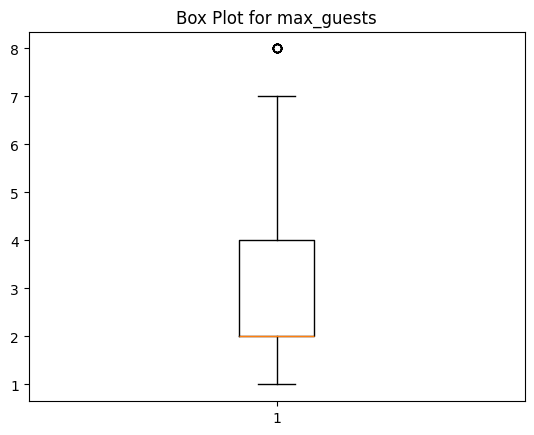

In [10]:
plt.boxplot(df['max_guests'])
plt.title('Box Plot for max_guests')
plt.show()

C:\Users\amade\AppData\Local\Temp\ipykernel_27756\927174362.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Beds'], df['Baths']], labels=['Beds', 'Baths'])


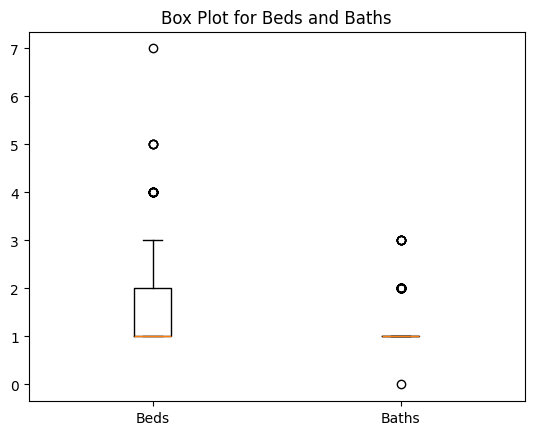

In [11]:
#beds and baths
df[['Beds', 'Baths']].describe()

plt.boxplot([df['Beds'], df['Baths']], labels=['Beds', 'Baths'])
plt.title('Box Plot for Beds and Baths')
plt.show()



In [12]:
#location
df['location'].value_counts()


location
San Rafael                    86
San Anselmo                   33
Mill Valley                   32
Novato                        32
Fairfax                       21
Kentfield                      6
Larkspur                       4
Woodacre                       4
Muir Beach                     3
Sausalito                      2
Stinson Beach                  2
Nicasio                        2
Richmond                       2
Bolinas                        1
Fairfield                      1
Point Reyes Station            1
San Geronimo, Marin County     1
Kensington                     1
Rodeo                          1
Lagunitas-Forest Knolls        1
Inverness                      1
Name: count, dtype: int64

# 1.5 Feature Engineering

In [13]:
#One hot encoding for location
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity
location_encoded = encoder.fit_transform(df[['location']])





In [14]:
# Convert the one-hot encoded array to a DataFrame and concatenate with the original DataFrame
location_encoded_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(['location']))
df_encoded = pd.concat([df, location_encoded_df], axis=1)



In [15]:
df_encoded.head()


,coordinates/latitude,coordinates/longitude,max_guests,Beds,Baths,total_price,price_per_night,base_price,service_fee,personCapacity,...,location_Novato,location_Point Reyes Station,location_Richmond,location_Rodeo,location_San Anselmo,"location_San Geronimo, Marin County",location_San Rafael,location_Sausalito,location_Stinson Beach,location_Woodacre
0,37.97390,-122.54089,3,1,1,981,196,750,121.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,37.96932,-122.50073,8,4,2,1762,352,1245,218.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.97059,-122.53865,4,3,0,970,162,132,120.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,38.00510,-122.56193,2,1,1,523,105,403,65.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37.97775,-122.52537,2,1,1,549,110,416,68.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 3. Split the data

In [16]:
# Features: max_guests, Beds, Baths, and the one-hot encoded locations
X = df_encoded[['max_guests', 'Beds', 'Baths'] + list(location_encoded_df.columns)]
y = df_encoded['price_per_night']


# Train a simple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
y.shape

(237,)

In [18]:
X.shape

(237, 23)

In [19]:
X.head()

,max_guests,Beds,Baths,location_Fairfax,location_Fairfield,location_Inverness,location_Kensington,location_Kentfield,location_Lagunitas-Forest Knolls,location_Larkspur,...,location_Novato,location_Point Reyes Station,location_Richmond,location_Rodeo,location_San Anselmo,"location_San Geronimo, Marin County",location_San Rafael,location_Sausalito,location_Stinson Beach,location_Woodacre
0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 3.1 Linear Regression model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
#predict error of model
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error: {mse_lr}')
print(f'R^2 Score: {r2_lr}')





Mean Squared Error: 10192.623300099236
R^2 Score: 0.6459414321057536


## 3.2 Random Forest Regressor

In [22]:
# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [23]:
# Fit the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
# make predictions
y_pred_rf = rf_regressor.predict(X_test)


In [25]:
#evalueate the model
# Evaluate the model
mse_rfr = mean_squared_error(y_test, y_pred_rf)
r2_rfr = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rfr}')
print(f'R-squared: {r2_rfr}')



Mean Squared Error: 14996.31924984502
R-squared: 0.47907666545143945


## 3.3 Gradient Boosting Regressor

In [26]:
# Initialize the Gradient Boosting Regressor with default parameters
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [27]:
# Train the model on the training data
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [28]:
# Predict on the test set
y_pred_gbr = gbr.predict(X_test)


In [29]:
# Evaluate the model using MSE and R-squared
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Mean Squared Error: {mse_gbr}')
print(f'R-squared: {r2_gbr}')


Mean Squared Error: 14447.839095108493
R-squared: 0.49812908133955924


# 3.4 Support Vector Regressor

In [30]:
# Standardize the feature matrix (mean = 0, standard deviation = 1)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Initialize the SVR with an RBF kernel (default)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the scaled training data
svr.fit(X_train_scaled, y_train)


SVR()

In [32]:
# Predict on the test set
y_pred = svr.predict(X_test_scaled)


In [33]:
# Evaluate the model using MSE and R-squared
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_svr}')
print(f'R-squared: {r2_svr}')


Mean Squared Error: 31232.302484865464
R-squared: -0.084908562226931


## 3.5 Visualize the Results

In [34]:
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "SVR"],
    "MSE": [mse_lr, mse_rfr,  mse_gbr, mse_svr],
    "R²": [r2_lr, r2_rfr, r2_gbr, r2_svr]
}

In [35]:
X.shape

(237, 23)

In [36]:
len(y)

237

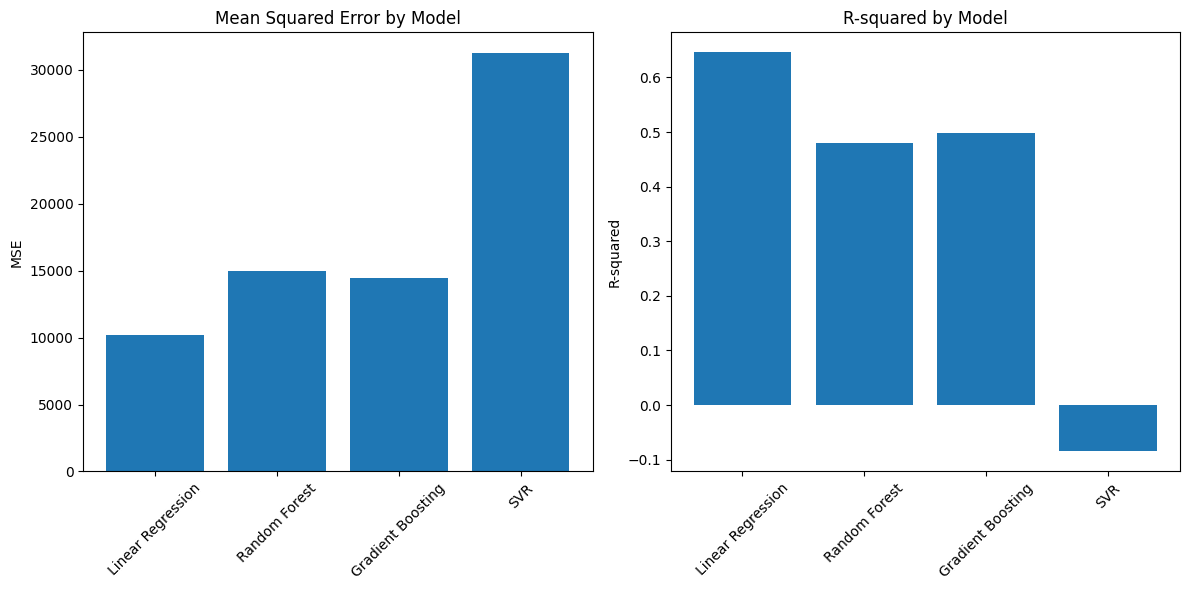

            Model          MSE        R²
Linear Regression 10192.623300  0.645941
    Random Forest 14996.319250  0.479077
Gradient Boosting 14447.839095  0.498129
              SVR 31232.302485 -0.084909


In [38]:
#plot results
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['MSE'])
plt.title('Mean Squared Error by Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['R²'])
plt.title('R-squared by Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the results table
print(results_df.to_string(index=False))



In [28]:
df.to_csv('./datasets/airbnb_cleaned.csv', index=False)